## The classification goal is to predict if the client will subscribe a term deposit or not

## Results

- Best Performance from - Cost Sensitive Kernel SVC
- Based on F2 Score:      

- Best parameters: C =0.001, kernel = 'rbf' class_weight: {0: 1, 1: 1}               
- Best Mean cross-validation score: 0.92

- SVC Test Performance:  0.926687464549064
- SVC Val Performance:  0.9249358426005133

- Multiple models gave the same score for F2 score so among these the model was picked based on ROC_AUC score



- Best parameters: {'class_weight': {0: 1, 1: 1}}

- Best Mean cross-validation score: 0.81

- SVC Test Performance:  0.8146890571376564
- SVC Val Performance:  0.8214070451064671

## The chosen metric:

In [1]:
#creating a scorer for F2 score so that we can given an emphases on the minority class predictions
from sklearn.metrics import fbeta_score, make_scorer
f2score = make_scorer(fbeta_score, beta=2)
f2score

make_scorer(fbeta_score, beta=2)

## Importing Libraries and Data

In [410]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps

In [411]:
data = pd.read_csv("D:\\EverythingDS\\DataSets\\bank\\banking_termdeposit.csv")

In [412]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,50.0,admin.,single,secondary,no,2252.0,no,no,cellular,30.0,apr,652.0,2.0,-1.0,0.0,unknown,yes
1,32.0,management,single,tertiary,no,10281.0,no,no,cellular,22.0,apr,400.0,1.0,-1.0,0.0,unknown,yes
2,77.0,retired,divorced,secondary,no,0.0,NaN,no,NaN,25.0,sep,210.0,1.0,-1.0,0.0,unknown,yes
3,53.0,management,NaN,NaN,no,2152.0,no,no,cellular,13.0,feb,75.0,3.0,-1.0,0.0,unknown,yes
4,40.0,self-employed,single,tertiary,no,1616.0,no,no,telephone,28.0,jul,1009.0,7.0,-1.0,0.0,unknown,yes


In [413]:
# from sklearn.utils import shuffle
# data = shuffle(data)
# data.reset_index(inplace=True, drop=True)

In [414]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18240 entries, 0 to 18239
Data columns (total 17 columns):
age          17679 non-null float64
job          17850 non-null object
marital      17305 non-null object
education    17545 non-null object
default      16815 non-null object
balance      18061 non-null float64
housing      17298 non-null object
loan         17513 non-null object
contact      16677 non-null object
day          16755 non-null float64
month        16952 non-null object
duration     16438 non-null float64
campaign     16774 non-null float64
pdays        16767 non-null float64
previous     17124 non-null float64
poutcome     18240 non-null object
y            18240 non-null object
dtypes: float64(7), object(10)
memory usage: 2.4+ MB


## Checking Requirements

#### Rows and Coulmn Count

In [415]:
data.shape

(18240, 17)

#### Balance of the target variable

In [416]:
x = data["y"].value_counts()
x/x.sum()

no     0.710033
yes    0.289967
Name: y, dtype: float64

In [417]:
# cumulative missing values
data.isnull().sum()

age           561
job           390
marital       935
education     695
default      1425
balance       179
housing       942
loan          727
contact      1563
day          1485
month        1288
duration     1802
campaign     1466
pdays        1473
previous     1116
poutcome        0
y               0
dtype: int64

In [418]:
# percentage missing values
data.isnull().mean()

age          0.030757
job          0.021382
marital      0.051261
education    0.038103
default      0.078125
balance      0.009814
housing      0.051645
loan         0.039857
contact      0.085691
day          0.081414
month        0.070614
duration     0.098794
campaign     0.080373
pdays        0.080757
previous     0.061184
poutcome     0.000000
y            0.000000
dtype: float64

#### Percentage of Missing Values

In [419]:
(data.isna().sum().sum()/(len(df.axes[0])*len(df.axes[1])))*100

5.175116099071207

#### Data Exploration

In [420]:
# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='y' and data[var].nunique()<10]

continuous = [var for var in data.columns if data[var].dtype!='O' and var!='y' and var not in discrete]

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O' and var!='y']

print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')

There are 0 discrete variables
There are 7 continuous variables
There are 9 categorical variables


In [421]:
for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

age [50. 32. 77. 53. 40. 47. 38. 41. 33. 22. 39. 34. 31. 48. 75. 71. 25. 27.
 58. 29.] 

job ['admin.' 'management' 'retired' 'self-employed' 'technician' 'services'
 'student' nan 'blue-collar' 'entrepreneur' 'unknown' 'unemployed'
 'housemaid'] 

marital ['single' 'divorced' nan 'married'] 

education ['secondary' 'tertiary' nan 'unknown' 'primary'] 

default ['no' nan 'yes'] 

balance [ 2252. 10281.     0.  2152.  1616.   293.  2678.  4004.  1536.   344.
  2983.  2138.   666.  -537.  2892.    75.   260.  4984.  3230.   469.] 

housing ['no' nan 'yes'] 

loan ['no' nan 'yes'] 

contact ['cellular' nan 'telephone' 'unknown'] 

day [30. 22. 25. 13. 28.  1. 17.  9. 18.  3. 10. 21.  7. nan 24. 16. 15.  8.
 20. 26.] 

month ['apr' 'sep' 'feb' 'jul' 'jun' nan 'may' 'dec' 'aug' 'nov' 'oct' 'jan'
 'mar'] 

duration [ 652.  400.  210.   75. 1009.  251.   nan  314.  359.  347.  472.  164.
  342. 1503.  407.  479.  226.  509.  161.  165.] 

campaign [ 2.  1.  3.  7. nan  9.  4.  8. 24.  5.  6. 

In [422]:
data[continuous].nunique()

age           76
balance     4721
day           31
duration    1438
campaign      39
pdays        477
previous      35
dtype: int64

In [423]:
data[categorical].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

In [424]:
data['job'].value_counts()

management       3905
blue-collar      3437
technician       2942
admin.           2123
services         1556
retired          1127
self-employed     621
unemployed        549
student           529
entrepreneur      509
housemaid         445
unknown           107
Name: job, dtype: int64

In [571]:
data['y'].value_counts()

1    12951
0     5289
Name: y, dtype: int64

In [574]:
for i in categorical:
    if var != "y":
        plt.style.use('seaborn-whitegrid')
        fig = plt.figure(figsize=(20,4)) 
        sns.countplot(y="i, data=data);

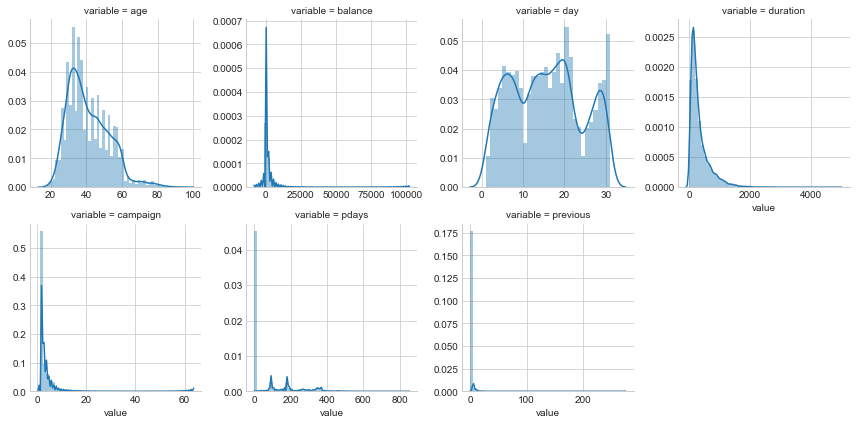

In [427]:
# Checking skewness of other variables via numeric plots
nd = pd.melt(data, value_vars = continuous)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [428]:
data.skew(axis = 0, skipna = True).sort_values(ascending=False)

previous    46.256601
balance      8.654383
campaign     5.105478
duration     2.544773
pdays        2.452114
age          0.800408
day          0.105374
dtype: float64

In [429]:
np.log1p(data.skew(axis = 0, skipna = True)).sort_values(ascending=False)

previous    3.855592
balance     2.267412
campaign    1.809186
duration    1.265474
pdays       1.238987
age         0.588014
day         0.100184
dtype: float64

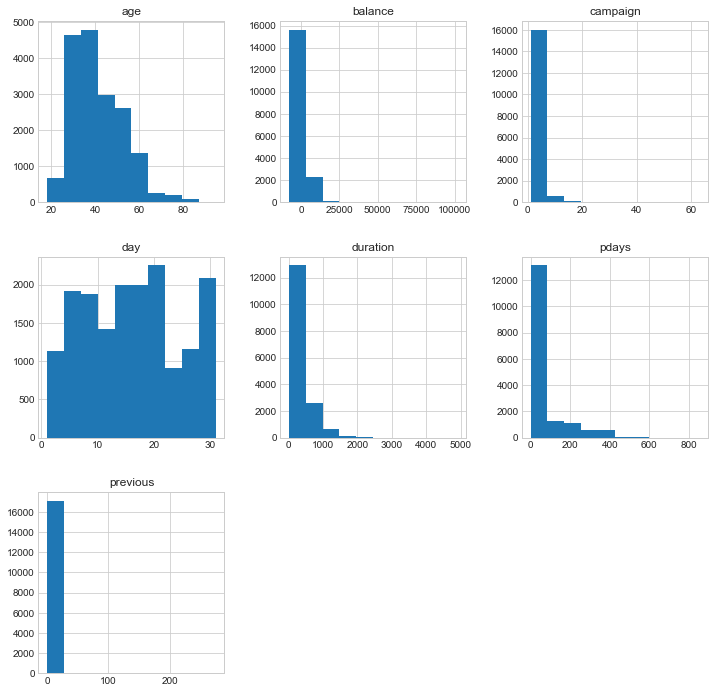

In [430]:
num_column = data.dtypes[data.dtypes != 'object']
data[list(num_column.index)].hist(figsize = (12,12));

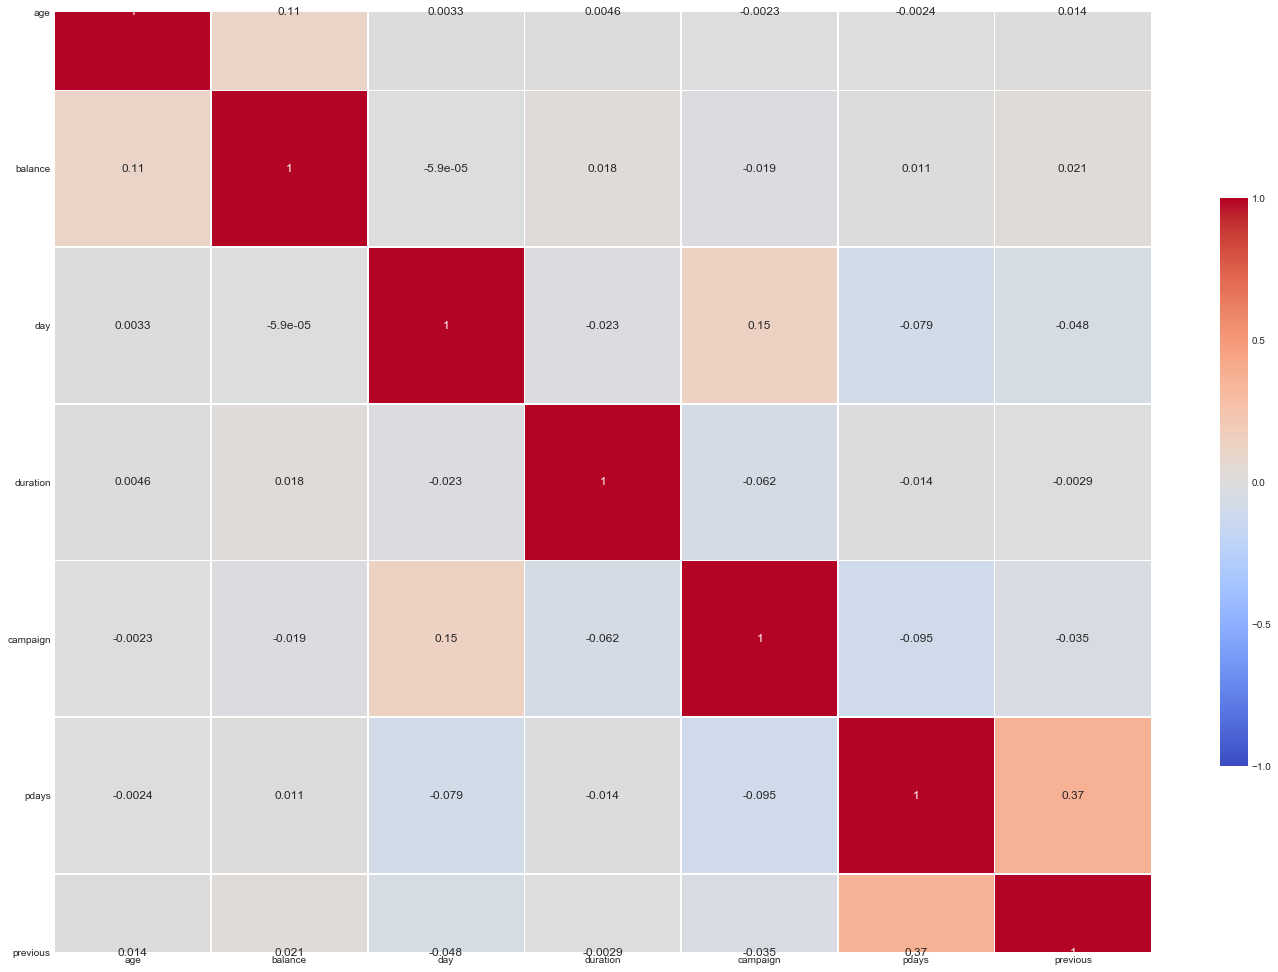

In [431]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
f, ax = plt.subplots(figsize=(20,20)) 
heatmap = sns.heatmap(data.corr(), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(data.corr().columns, rotation = 0)
ax.set_xticklabels(data.corr().columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.tight_layout()

In [432]:
# Using Predictive Power to determine relationship bw variables that consider even non numeric data and also determine 
# non linear relationship between data
# https://github.com/8080labs/ppscore

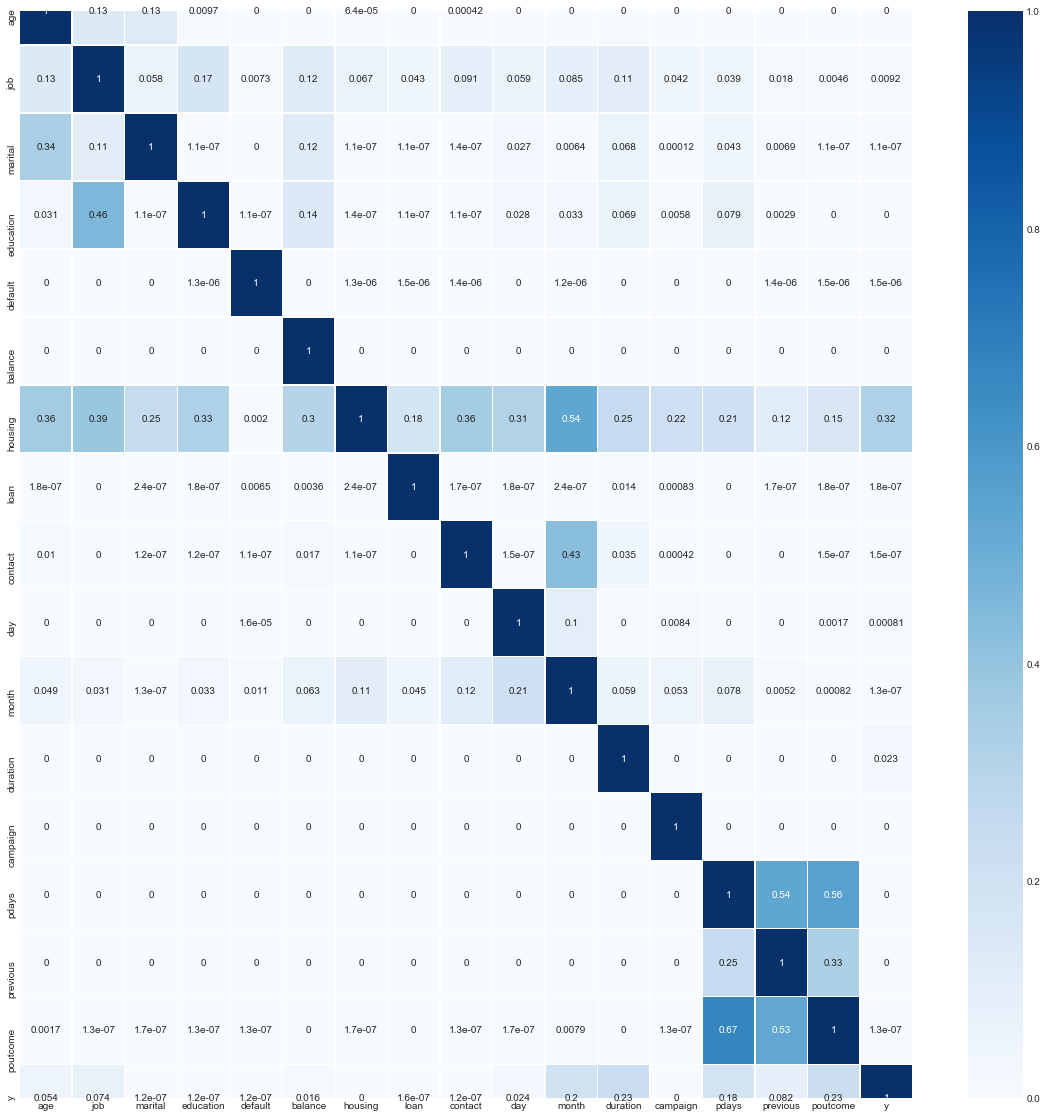

In [433]:
pps.matrix(data)
df_matrix = pps.matrix(data)
fig = plt.figure(figsize=(20,20)) 
sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

#### Mapping the target var to 0/1

In [434]:
data['y']=data['y'].map({'yes': 0, 'no': 1})
data.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,50.0,admin.,single,secondary,no,2252.0,no,no,cellular,30.0,apr,652.0,2.0,-1.0,0.0,unknown,0
1,32.0,management,single,tertiary,no,10281.0,no,no,cellular,22.0,apr,400.0,1.0,-1.0,0.0,unknown,0
2,77.0,retired,divorced,secondary,no,0.0,NaN,no,NaN,25.0,sep,210.0,1.0,-1.0,0.0,unknown,0
3,53.0,management,NaN,NaN,no,2152.0,no,no,cellular,13.0,feb,75.0,3.0,-1.0,0.0,unknown,0


In [485]:
# Adding constant value to all cells of particular columns to accomodate transformers

In [440]:
data['balance'] = data['balance']+8020

In [441]:
max(data["balance"])

110147.0

In [458]:
min(data['balance'])

1.0

In [443]:
continuous

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [452]:
data['pdays'] = data['pdays']+2

In [459]:
min(data["pdays"])

1.0

In [470]:
data['previous'] = data['previous']+0.0001

In [472]:
min(data["previous"])

0.0001

## Splitting Data

In [577]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(data.drop('y',axis=1), data.y , test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

## Data Preprocessing

In [578]:
# import relevant modules for feature engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder
from feature_engine.variable_transformers import YeoJohnsonTransformer
from feature_engine.variable_transformers import LogTransformer
from feature_engine.variable_transformers import BoxCoxTransformer
from feature_engine.variable_transformers import PowerTransformer
from feature_engine.discretisers import DecisionTreeDiscretiser
from feature_engine.discretisers import EqualFrequencyDiscretiser
from feature_engine.missing_data_imputers import RandomSampleImputer

In [579]:
prep_pipe = Pipeline([
    
    # Imputers
    ('rand_imputer', RandomSampleImputer(random_state=40, 
                                         seed = 'general', 
                                         variables = ['job', 'marital', 'education', 'housing','contact', 'day', 'month'])),
    
    ('median_imputer', mdi.MeanMedianImputer
                         (imputation_method='median',variables=['age','balance','duration','campaign','pdays','previous'])),
    
    ('mode_imputer', mdi.FrequentCategoryImputer(variables=['loan','default'])),
    
    # Encoder
    
    # ('categorical_encoder', OneHotCategoricalEncoder(top_categories = None, variables = categorical, drop_last = True)),
      ('ordinal_enc', OrdinalCategoricalEncoder(variables=categorical,encoding_method='arbitrary')),  
    
    # Transformers
    
    # ('lt', LogTransformer(variables = continuous)),
    
    # Discretisers
    ('desc', EqualFrequencyDiscretiser(q=50, variables = continuous)),
    # Scaling
    ("standardscaler" , StandardScaler(with_mean=True, with_std=False)),
    ("robustscaler" , RobustScaler(with_centering=False, with_scaling=True, quantile_range=(0, 100))) 
])

In [580]:
prep_pipe.fit(X_train)

Pipeline(memory=None,
         steps=[('rand_imputer',
                 RandomSampleImputer(random_state=40, seed='general',
                                     seeding_method='add',
                                     variables=['job', 'marital', 'education',
                                                'housing', 'contact', 'day',
                                                'month'])),
                ('median_imputer',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['age', 'balance', 'duration',
                                              'campaign', 'pdays',
                                              'previous'])),
                ('mode_imputer',
                 Frequent...
                                                      'contact', 'month',
                                                      'poutcome'])),
                ('desc',
                 EqualFrequencyDiscretiser(q=50, return_object=False

In [581]:
X_train=prep_pipe.transform(X_train)
X_test=prep_pipe.transform(X_test)
X_val=prep_pipe.transform(X_val)

## Basic Algorithms

In [584]:
from sklearn.model_selection import GridSearchCV

#### Dummy Classifier

In [585]:
# Naive Algorithm 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
model_dummy = DummyClassifier(strategy='stratified',random_state=42)
model_dummy.fit(X_train,y_train)
cv_scores = cross_val_score(model_dummy, X_train, y_train,scoring= f2score)

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()
# Check test data set performance
print("Naive Algorithm Validation Performance: ", model_dummy.score(X_val,y_val))
print("Naive Algorithm Test Performance: ", model_dummy.score(X_test,y_test))

Mean Cross-validation scores: 0.70411855072928

Naive Algorithm Validation Performance:  0.5910087719298246
Naive Algorithm Test Performance:  0.5951206140350878


#### Logistic Regression

In [596]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg=LogisticRegression(max_iter=1000, random_state=42)

logreg_param= {'C': [0.001,0.01,0.1,1,10,100], 'penalty': ['l2'], 'solver':['saga', 'newton-cg', 'lbfgs', 'liblinear']}
logreg_grid = GridSearchCV(logreg, logreg_param,cv=5, return_train_score=True, scoring= f2score)
logreg_grid.fit(X_train,y_train)

#find best parameters
print('Decision Tree parameters: ', logreg_grid.best_params_)
print()

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()


# Check test data set performance
print("Logistic Test Performance: ", logreg_grid.score(X_test,y_test))
print("Logistic Validation Performance: ", logreg_grid.score(X_val,y_val))

Decision Tree parameters:  {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}

Mean Cross-validation scores: 0.8115896798596254

Logistic Test Performance:  0.926687464549064
Logistic Validation Performance:  0.9249358426005133


#### KNN

In [604]:
# Train a KNN model, report the coefficients, the best parameters, and model performance 
# hint: find the optimal k

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'n_neighbors': range(5,25), 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'weights':['uniform','distance']}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True, scoring= f2score)
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN Best parameters: ',grid_knn.best_params_)
print()

#Check test data set performance
print("KNN Test Performance: ",grid_knn.score(X_test,y_test))
print("KNN Val Performance: ",grid_knn.score(X_val,y_val))
print()

Best Mean Cross-validation score: 0.87

KNN Best parameters:  {'algorithm': 'auto', 'n_neighbors': 23, 'weights': 'uniform'}

KNN Test Performance:  0.8670391061452515
KNN Val Performance:  0.872873097968668



#### Decision Tree

In [603]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {"max_depth": range(1,10),
           "min_samples_split": range(2,10),
           "max_leaf_nodes": range(2,6),
           "criterion":['gini'],
           "splitter":['best','random']}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True, scoring = f2score)
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree Best parameters: ',grid_dtree.best_params_)
print()

#Check test data set performance
print("Decision Tree Test Performance: ",grid_dtree.score(X_test,y_test))
print("Decision Tree Val Performance: ",grid_dtree.score(X_val,y_val))
print()

Best Mean Cross-validation score: 0.92

Decision Tree Best parameters:  {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_split': 2, 'splitter': 'random'}

Decision Tree Test Performance:  0.926687464549064
Decision Tree Val Performance:  0.9249358426005133



#### LinearSVC

In [602]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state=42)
param = [{'penalty':['l2'], 'C': [0.001, 0.01, 0.1], 'loss':['hinge','squared_hinge']}]

svc_grid = GridSearchCV(lsvc, param, cv=5,return_train_score=True,scoring= f2score)
svc_grid.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(svc_grid.best_score_))
print()

#find best parameters
print('Decision Tree Best parameters: ',svc_grid.best_params_)
print()

#Check test data set performance
print("Linear SVC Test Performance: ",svc_grid.score(X_test,y_test))
print("Linear SVC Val Performance: ",svc_grid.score(X_val,y_val))
print()

Best Mean Cross-validation score: 0.92

Decision Tree Best parameters:  {'C': 0.001, 'loss': 'hinge', 'penalty': 'l2'}

Linear SVC Test Performance:  0.926687464549064
Linear SVC Val Performance:  0.9249358426005133



#### Kernel SVC

In [605]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

param_grid = {'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}

svm_grid = GridSearchCV(svc, param_grid, cv=5,return_train_score=True,scoring=f2score)
svm_grid.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(svm_grid.best_score_))
print()

#find best parameters
print('Support Vector Classifier Best parameters: ',svm_grid.best_params_)
print()

#Check test data set performance
print("Support Vector Classifier Test Performance: ",svm_grid.score(X_test,y_test))
print("Support Vector Classifier Val Performance: ",svm_grid.score(X_val,y_val))
print()

Best Mean Cross-validation score: 0.92

Support Vector Classifier Best parameters:  {'C': 0.001, 'kernel': 'rbf'}

Support Vector Classifier Test Performance:  0.926687464549064
Support Vector Classifier Val Performance:  0.9249358426005133



## Ensemble Models

In [611]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#### Bagging with DTree

In [612]:
bag_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=True, random_state=0, oob_score=False)

bag_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}

bag_dtree1_grid = GridSearchCV(bag_dtree1, bag_dtree1_param,cv=5, return_train_score=True, scoring= f2score)
bag_dtree1_grid.fit(X_train,y_train)
print(f'Best Params: {bag_dtree1_grid.best_params_}')
print()
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_score_}')
print()
print(f'Test score is {bag_dtree1_grid.score(X_test,y_test)}')
print(f'Train score is {bag_dtree1_grid.score(X_val,y_val)}')

Best Params: {'base_estimator__max_depth': 1, 'max_samples': 1, 'n_estimators': 10}

Best Mean Cross Validation Score is 0.9236018193980904

Test score is 0.926687464549064
Train score is 0.9249358426005133


#### Random Forest

In [620]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto'],
    'max_depth' : [2,4,6,8,9],
    'criterion' :['gini', 'entropy'],
    'min_samples_split':[2,3,4,6,8],
    'min_samples_leaf':[1,2,3]
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True,scoring = f2score)
rfc_grid.fit(X_train,y_train)

print(f'Best Params: {rfc_grid.best_params_}')
print()
print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print()
print(f'Test score is {rfc_grid.score(X_test,y_test)}')
print(f'Train score is {rfc_grid.score(X_val,y_val)}')

Best Params: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

Best Mean Cross Validation Score is 0.9217341789027842

Test score is 0.9239207864368144
Train score is 0.923683267646005


#### Extra Trees Classifier

In [621]:
from  sklearn.ensemble import ExtraTreesClassifier
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200,300,500],
    'max_features': ['auto'],
    'max_depth' : [2,3,4,6],
    'criterion' :['gini', 'entropy'],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2]
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True, scoring = f2score)
etc_grid.fit(X_train,y_train)

print(f'Best Params: {etc_grid.best_params_}')
print()
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print()
print(f'Test score is {etc_grid.score(X_test,y_test)}')
print(f'Train score is {etc_grid.score(X_val,y_val)}')

Best Params: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best Mean Cross Validation Score is 0.9236018193980904

Test score is 0.926687464549064
Train score is 0.9249358426005133


#### Gradient Boosting

In [622]:
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'min_samples_split':[2,3],
              'subsample':[0.6,0.8,1],
              'min_samples_leaf':[1,2],
              'max_depth' : [2,3,7],
#               'max_features':['auto'],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2]
             }

gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, scoring = f2score)
gbc_grid.fit(X_train,y_train)

print(f'Best Params: {gbc_grid.best_params_}')
print()
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print()
print(f'Test score is {gbc_grid.score(X_test,y_test)}')
print(f'Train score is {gbc_grid.score(X_val,y_val)}')

Best Params: {'learning_rate': 2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.6}

Best Mean Cross Validation Score is 0.9034488808308238

Test score is 0.9054498641109999
Train score is 0.9022583429229


#### XGBoost

In [623]:
from xgboost import XGBClassifier
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,5,7],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
              'gamma' : [0.5,1.0,2],
              'min_child_weight' : [1,2],
              'subsample':[0.8,1],
              'colsample_bytree':[0.6,0.8],
              'lambda':[0.1,0.5,1],
              'alpha':[0.1,0.5,1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True, scoring = f2score)
xgbc_grid.fit(X_train,y_train)

print(f'Best Params: {xgbc_grid.best_params_}')
print()
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print()
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')
print(f'Train score is {xgbc_grid.score(X_val,y_val)}')

Best Params: {'alpha': 0.1, 'colsample_bytree': 0.6, 'gamma': 0.5, 'lambda': 0.1, 'learning_rate': 2, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.8}

Best Mean Cross Validation Score is 0.9236018193980904

Test score is 0.926687464549064
Train score is 0.9249358426005133


## Summary

In [627]:
classifiers={'knn':grid_knn,
             'logreg':logreg_grid,
             'lsvc':svc_grid,
             'ksvc':svm_grid,
             'dtree':grid_dtree,
             'bag_dtree1':bag_dtree1_grid,
             'rfc': rfc_grid,
             'etc': etc_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}

In [628]:
classifiers.keys()

dict_keys(['knn', 'logreg', 'lsvc', 'ksvc', 'dtree', 'bag_dtree1', 'rfc', 'etc', 'gbc', 'xgbc'])

In [629]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [630]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])

In [631]:
# Show the accuracy dataframe
accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
1,logreg,0.923602,0.000071
2,lsvc,0.923602,0.000071
3,ksvc,0.923602,0.000071
4,dtree,0.923602,0.000071
5,bag_dtree1,0.923602,0.000071
7,etc,0.923602,0.000071
9,xgbc,0.923602,0.000071
6,rfc,0.921734,0.000717
8,gbc,0.903449,0.028215
0,knn,0.873481,0.005070


In [632]:
# Create a prediction of all models on the test set
predictions_all = {}
for  key, value in classifiers.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_val)
    
    # Save predictions to a list
    predictions_all[key] = predictions

In [633]:
# Creat a DataFrame for the predictions
pred = pd.DataFrame(predictions_all)

Text(0.5, 1, 'Correlation of the test set label prediction between models')

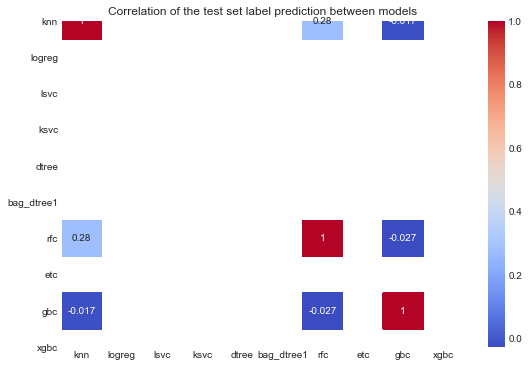

In [634]:
# Plot a heatmap of all correlations for easier visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [635]:
def get_redundant_pairs(data):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = data.columns
    for i in range(0, data.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [637]:
def get_top_abs_correlations(data, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

In [638]:
print("Least Absolute Correlations")
print(get_top_abs_correlations(pred, 5))

Least Absolute Correlations
knn  gbc       0.016839
rfc  gbc       0.026805
knn  rfc       0.281643
     logreg         NaN
     lsvc           NaN
dtype: float64


#### Voting

In [643]:
from sklearn.ensemble import VotingClassifier

In [644]:
vclf1 = VotingClassifier(estimators=
                              [('knn', grid_knn.best_estimator_), 
                               ('logreg', logreg_grid.best_estimator_), 
#                                ('ksvc', svm_grid.best_estimator_),
                               ('rfc', rfc_grid.best_estimator_)
                              ], )
vclf1_param = {
              'voting' : ['hard','soft'],
             }
vclf1_grid = GridSearchCV(vclf1, vclf1_param,cv=5, return_train_score=True, scoring = f2score )
vclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('knn',
                                                     KNeighborsClassifier(algorithm='auto',
                                                                          leaf_size=30,
                                                                          metric='minkowski',
                                                                          metric_params=None,
                                                                          n_jobs=None,
                                                                          n_neighbors=23,
                                                                          p=2,
                                                                          weights='uniform')),
                                                    ('logreg',
                                                     LogisticRegression(C=0.001,
                                         

In [645]:
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_score_}')
print(f'Best Params {vclf1_grid.best_params_}')
print(f'Train score is {vclf1_grid.score(X_train,y_train)}')
print(f'Test score is {vclf1_grid.score(X_test,y_test)}')
print(f'Val score is {vclf1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9221215541370782
Best Params {'voting': 'hard'}
Train score is 0.9222102361260937
Test score is 0.9237233815255323
Val score is 0.9238429574437598


In [646]:
vclf2 = VotingClassifier(estimators=
                              [('knn', grid_knn.best_estimator_), 
                               ('logreg', logreg_grid.best_estimator_), 
#                                ('lsvc', svc_grid.best_estimator_),
                               ('xgb', xgbc_grid.best_estimator_)
                              ], )
vclf2_param = {
              'voting' : ['hard','soft'],
             }
vclf2_grid = GridSearchCV(vclf2, vclf2_param,cv=5, return_train_score=True, scoring = f2score )
vclf2_grid.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('knn',
                                                     KNeighborsClassifier(algorithm='auto',
                                                                          leaf_size=30,
                                                                          metric='minkowski',
                                                                          metric_params=None,
                                                                          n_jobs=None,
                                                                          n_neighbors=23,
                                                                          p=2,
                                                                          weights='uniform')),
                                                    ('logreg',
                                                     LogisticRegression(C=0.001,
                                         

In [647]:
print(f'Best Mean Cross Validation Score is {vclf2_grid.best_score_}')
print(f'Best Params {vclf2_grid.best_params_}')
print(f'Train score is {vclf2_grid.score(X_train,y_train)}')
print(f'Test score is {vclf2_grid.score(X_test,y_test)}')
print(f'Val score is {vclf2_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9236018193980904
Best Params {'voting': 'hard'}
Train score is 0.9236018324107654
Test score is 0.926687464549064
Val score is 0.9249358426005133


#### Stacking

In [648]:
from sklearn.ensemble import StackingClassifier

In [649]:
sclf1 = StackingClassifier(estimators=
                              [('knn', grid_knn.best_estimator_), 
                               ('logreg', logreg_grid.best_estimator_), 
#                                ('ksvc', svm_grid.best_estimator_),
                               ('rfc', rfc_grid.best_estimator_)
                              ], final_estimator=XGBClassifier())
sclf1_param = {
              'final_estimator__C' : [0.01,0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True, scoring = f2score )
sclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('knn',
                                                       KNeighborsClassifier(algorithm='auto',
                                                                            leaf_size=30,
                                                                            metric='minkowski',
                                                                            metric_params=None,
                                                                            n_jobs=None,
                                                                            n_neighbors=23,
                                                                            p=2,
                                                                            weights='uniform')),
                                                      ('logreg',
                                                   

In [650]:
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')
print(f'Val score is {sclf1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8357816186281758
Best Mean Cross Validation Score is {'final_estimator__C': 0.01, 'stack_method': 'auto'}
Train score is 0.8484050037092937
Test score is 0.8434374052743255
Val score is 0.8419520416762432


In [651]:
sclf2 = StackingClassifier(estimators=
                              [('knn', grid_knn.best_estimator_), 
#                                ('lsvc', svc_grid.best_estimator_),
                               ('xgb', xgbc_grid.best_estimator_)
                              ], final_estimator=LogisticRegression())
sclf2_param = {
              'final_estimator__C' : [0.01, 0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True, scoring = f2score )
sclf2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('knn',
                                                       KNeighborsClassifier(algorithm='auto',
                                                                            leaf_size=30,
                                                                            metric='minkowski',
                                                                            metric_params=None,
                                                                            n_jobs=None,
                                                                            n_neighbors=23,
                                                                            p=2,
                                                                            weights='uniform')),
                                                      ('xgb',
                                                      

In [652]:
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')
print(f'Val score is {sclf2_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9180550416751114
Best Mean Cross Validation Score is {'final_estimator__C': 0.01, 'stack_method': 'auto'}
Train score is 0.9193790201673357
Test score is 0.9134684490441282
Val score is 0.9128360797918472


In [656]:
sclf3 = StackingClassifier(estimators=
                              [('knn', grid_knn.best_estimator_), 
#                                ('lsvc', svc_grid.best_estimator_),
                               ('xgb', xgbc_grid.best_estimator_)
                              ], final_estimator=LogisticRegression())
sclf3_param = {
              'final_estimator__C' : [0.01, 0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf3_grid = GridSearchCV(sclf3, sclf3_param,cv=5, return_train_score=True, scoring = f2score )
sclf3_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('knn',
                                                       KNeighborsClassifier(algorithm='auto',
                                                                            leaf_size=30,
                                                                            metric='minkowski',
                                                                            metric_params=None,
                                                                            n_jobs=None,
                                                                            n_neighbors=23,
                                                                            p=2,
                                                                            weights='uniform')),
                                                      ('xgb',
                                                      

In [654]:
print(f'Best Mean Cross Validation Score is {sclf3_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf3_grid.best_params_}')
print(f'Train score is {sclf3_grid.score(X_train,y_train)}')
print(f'Test score is {sclf3_grid.score(X_test,y_test)}')
print(f'Val score is {sclf3_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9180550416751114
Best Mean Cross Validation Score is {'final_estimator__C': 0.01, 'stack_method': 'auto'}
Train score is 0.9193790201673357
Test score is 0.9134684490441282
Val score is 0.9128360797918472


## Cost Sensitive Algorithms

#### Logistic Regeression

In [680]:
#cost sensitive logistic regession
param_grid = {
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_logreg= GridSearchCV(LogisticRegression(C = 0.001, penalty='l2', solver = 'saga'), param_grid, 
                           cv=5, n_jobs=2, scoring= f2score)
cgrid_logreg.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_logreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_logreg.best_score_))

# Check test data set performance
print("Logistic Test Performance: ", cgrid_logreg.score(X_test,y_test))
print("Logistic Validation Performance: ", cgrid_logreg.score(X_val,y_val))

Best parameters: {'class_weight': {0: 1, 1: 1}}
Best Mean cross-validation score: 0.92
Logistic Test Performance:  0.926687464549064
Logistic Validation Performance:  0.9249358426005133


In [681]:
#cost sensitive logistic regession
param_grid = {
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_logreg= GridSearchCV(LogisticRegression(C = 0.001, penalty='l2', solver = 'saga'), param_grid, 
                           cv=5, n_jobs=2, scoring= 'roc_auc')
cgrid_logreg.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_logreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_logreg.best_score_))

# Check test data set performance
print("Logistic Test Performance: ", cgrid_logreg.score(X_test,y_test))
print("Logistic Validation Performance: ", cgrid_logreg.score(X_val,y_val))

Best parameters: {'class_weight': {0: 10, 1: 1}}
Best Mean cross-validation score: 0.80
Logistic Test Performance:  0.8086706530377272
Logistic Validation Performance:  0.8152863549780698


In [660]:
#cost sensitive logistic regession
param_grid = {   
    'class_weight': [{0:29,1:71}, {0:71,1:29}],
}
#apply grid search
cgrid_logreg= GridSearchCV(LogisticRegression(C = 0.001, penalty='l2', solver = 'saga'), param_grid, 
                           cv=5, n_jobs=2, scoring= f2score)
cgrid_logreg.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_logreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_logreg.best_score_))

# Check test data set performance
print("Logistic Test Performance: ", cgrid_logreg.score(X_test,y_test))
print("Logistic Validation Performance: ", cgrid_logreg.score(X_val,y_val))

Best parameters: {'class_weight': {0: 29, 1: 71}}
Best Mean cross-validation score: 0.85
Logistic Test Performance:  0.6994291969661428
Logistic Validation Performance:  0.6839939868660495


C:\Users\srish\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [682]:
#cost sensitive logistic regession
param_grid = {   
    'class_weight': [{0:29,1:71}, {0:71,1:29}],
}
#apply grid search
cgrid_logreg= GridSearchCV(LogisticRegression(C = 0.001, penalty='l2', solver = 'saga'), param_grid, 
                           cv=5, n_jobs=2, scoring= 'roc_auc')
cgrid_logreg.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_logreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_logreg.best_score_))

# Check test data set performance
print("Logistic Test Performance: ", cgrid_logreg.score(X_test,y_test))
print("Logistic Validation Performance: ", cgrid_logreg.score(X_val,y_val))

Best parameters: {'class_weight': {0: 71, 1: 29}}
Best Mean cross-validation score: 0.61
Logistic Test Performance:  0.6926050251657864
Logistic Validation Performance:  0.6929633106254814


C:\Users\srish\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


#### SVC

In [663]:
param_grid = {
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

cgrid_svc= GridSearchCV(SVC(C =0.001, kernel = 'rbf'), param_grid, cv=5, n_jobs=2, scoring=f2score)
cgrid_svc.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_svc.best_params_))
print()
print("Best Mean cross-validation score: {:.2f}".format(cgrid_svc.best_score_))
print()
#Check test data set performance
print("SVC Test Performance: ",cgrid_svc.score(X_test,y_test))
print("SVC Val Performance: ",cgrid_svc.score(X_val,y_val))
print()

Best parameters: {'class_weight': {0: 1, 1: 1}}

Best Mean cross-validation score: 0.92

SVC Test Performance:  0.926687464549064
SVC Val Performance:  0.9249358426005133



In [664]:
param_grid = {   
    'class_weight': [{0:29,1:71}, {0:71,1:29}],
}

cgrid_svc= GridSearchCV(SVC(C =0.001, kernel = 'rbf'), param_grid, cv=5, n_jobs=2, scoring=f2score)
cgrid_svc.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_svc.best_params_))
print()
print("Best Mean cross-validation score: {:.2f}".format(cgrid_svc.best_score_))
print()
#Check test data set performance
print("SVC Test Performance: ",cgrid_svc.score(X_test,y_test))
print("SVC Val Performance: ",cgrid_svc.score(X_val,y_val))
print()

Best parameters: {'class_weight': {0: 29, 1: 71}}

Best Mean cross-validation score: 0.92

SVC Test Performance:  0.926687464549064
SVC Val Performance:  0.9249358426005133



In [773]:
param_grid = {
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

cgrid_svc= GridSearchCV(SVC(C =0.001, kernel = 'rbf'), param_grid, cv=5, n_jobs=2, scoring='roc_auc')
cgrid_svc.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_svc.best_params_))
print()
print("Best Mean cross-validation score: {:.2f}".format(cgrid_svc.best_score_))
print()
#Check test data set performance
print("SVC Test Performance: ",cgrid_svc.score(X_test,y_test))
print("SVC Val Performance: ",cgrid_svc.score(X_val,y_val))
print()

Best parameters: {'class_weight': {0: 1, 1: 1}}

Best Mean cross-validation score: 0.81

SVC Test Performance:  0.8146890571376564
SVC Val Performance:  0.8214070451064671



#### Decision Tree

In [665]:
param_grid = { 
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_dtree= GridSearchCV(DecisionTreeClassifier(criterion = 'gini', max_depth = 1, max_leaf_nodes=2, min_samples_split= 2, splitter='random'), 
                          param_grid, cv=5, n_jobs=2, scoring= f2score)
cgrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_dtree.best_score_))
#Check test data set performance
print("DTree Test Performance: ",cgrid_dtree.score(X_test,y_test))
print("DTree Val Performance: ",cgrid_dtree.score(X_val,y_val))
print()

Best parameters: {'class_weight': {0: 1, 1: 10}}
Best Mean cross-validation score: 0.92
DTree Test Performance:  0.926687464549064
DTree Val Performance:  0.9249358426005133



In [675]:
param_grid = { 
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_dtree= GridSearchCV(DecisionTreeClassifier(criterion = 'gini', max_depth = 1, max_leaf_nodes=2, min_samples_split= 2, splitter='random'), 
                          param_grid, cv=5, n_jobs=2, scoring= 'roc_auc')
cgrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_dtree.best_score_))
#Check test data set performance
print("DTree Test Performance: ",cgrid_dtree.score(X_test,y_test))
print("DTree Val Performance: ",cgrid_dtree.score(X_val,y_val))
print()

Best parameters: {'class_weight': {0: 1, 1: 1}}
Best Mean cross-validation score: 0.65
DTree Test Performance:  0.5907633202559052
DTree Val Performance:  0.5977833769741284



In [666]:
param_grid = {   
    'class_weight': [{0:29,1:71}, {0:71,1:29}],
}
#apply grid search
cgrid_dtree= GridSearchCV(DecisionTreeClassifier(criterion = 'gini', max_depth = 1, max_leaf_nodes=2, min_samples_split= 2, splitter='random'), 
                          param_grid, cv=5, n_jobs=2, scoring= f2score)
cgrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_dtree.best_score_))
#Check test data set performance
print("DTree Test Performance: ",cgrid_dtree.score(X_test,y_test))
print("DTree Val Performance: ",cgrid_dtree.score(X_val,y_val))
print()

Best parameters: {'class_weight': {0: 29, 1: 71}}
Best Mean cross-validation score: 0.92
DTree Test Performance:  0.926687464549064
DTree Val Performance:  0.9249358426005133



In [676]:
param_grid = {   
    'class_weight': [{0:29,1:71}, {0:71,1:29}],
}
#apply grid search
cgrid_dtree= GridSearchCV(DecisionTreeClassifier(criterion = 'gini', max_depth = 1, max_leaf_nodes=2, min_samples_split= 2, splitter='random'), 
                          param_grid, cv=5, n_jobs=2, scoring= 'roc_auc')
cgrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_dtree.best_score_))
#Check test data set performance
print("DTree Test Performance: ",cgrid_dtree.score(X_test,y_test))
print("DTree Val Performance: ",cgrid_dtree.score(X_val,y_val))
print()

Best parameters: {'class_weight': {0: 29, 1: 71}}
Best Mean cross-validation score: 0.64
DTree Test Performance:  0.6640681999470194
DTree Val Performance:  0.6787016451756336



#### XGBoost

In [683]:
#xgb
param_grid = { 
    'scale_pos_weight': [1, 2, 10, 25, 50, 75, 99, 100],
}
#apply grid search
cgrid_xgboost= GridSearchCV(XGBClassifier(), param_grid, cv=5, n_jobs=2, scoring=f2score)
cgrid_xgboost.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_xgboost.best_score_))
print()
print("XGB Test Performance: ",cgrid_dtree.score(X_test,y_test))
print("XGB Val Performance: ",cgrid_dtree.score(X_val,y_val))
print()

Best parameters: {'scale_pos_weight': 75}
Best Mean cross-validation score: 0.91

XGB Test Performance:  0.6640681999470194
XGB Val Performance:  0.6787016451756336



In [684]:
#xgb
param_grid = { 
    'scale_pos_weight': [1, 2, 10, 25, 50, 75, 99, 100],
}
#apply grid search
cgrid_xgboost= GridSearchCV(XGBClassifier(), param_grid, cv=5, n_jobs=2, scoring='roc_auc')
cgrid_xgboost.fit(X_train, y_train)
print("Best parameters: {}".format(cgrid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_xgboost.best_score_))
print()
print("XGB Test Performance: ",cgrid_dtree.score(X_test,y_test))
print("XGB Val Performance: ",cgrid_dtree.score(X_val,y_val))
print()

Best parameters: {'scale_pos_weight': 1}
Best Mean cross-validation score: 0.83

XGB Test Performance:  0.6640681999470194
XGB Val Performance:  0.6787016451756336



#### Random Forest

In [691]:
#random forest
from sklearn.model_selection import RepeatedStratifiedKFold
rf = RandomForestClassifier(class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
rfc_param = { 
    'n_estimators': [500],
    'max_features': ['auto'],
    'max_depth' : [2],
    'criterion' :['gini'],
    'min_samples_split':[2],
    'min_samples_leaf':[1]
}
rfc_grid2 = GridSearchCV(rf, rfc_param,cv=cv, return_train_score=True, scoring = 'roc_auc')
rfc_grid2.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_sample...
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                      

In [693]:
print('Mean cross_val_score ROC AUC: %.3f' % scores.mean())
print()
print(f'Best Mean Cross Validation Score is {rfc_grid2.best_score_}')
print()
print("XGB Test Performance: ",rfc_grid2.score(X_test,y_test))
print("XGB Val Performance: ",rfc_grid2.score(X_val,y_val))
print()

Mean cross_val_score ROC AUC: 0.814

Best Mean Cross Validation Score is 0.8082910856289054

XGB Test Performance:  0.8150336900397948
XGB Val Performance:  0.8237806652064841



In [694]:
#random forest
from sklearn.model_selection import RepeatedStratifiedKFold
rf = RandomForestClassifier(class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rf, X_train, y_train, scoring=f2score , cv=cv, n_jobs=-1)
rfc_param = { 
    'n_estimators': [500],
    'max_features': ['auto'],
    'max_depth' : [2],
    'criterion' :['gini'],
    'min_samples_split':[2],
    'min_samples_leaf':[1]
}
rfc_grid2 = GridSearchCV(rf, rfc_param,cv=cv, return_train_score=True, scoring = f2score)
rfc_grid2.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_sample...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [701]:
print('Mean cross_val_score F2: %.3f' % scores.mean())
print()
print(f'Best Mean Cross Validation Score is {rfc_grid2.best_score_}')
print()
print("RFC Test Performance: ",rfc_grid2.score(X_test,y_test))
print("RFC Val Performance: ",rfc_grid2.score(X_val,y_val))
print()

Mean cross_val_score F2: 0.813

Best Mean Cross Validation Score is 0.7301770241424309

RFC Test Performance:  0.7398406374501992
RFC Val Performance:  0.7443131581062615



#### Extra Trees

In [699]:
#extratrees
etc = ExtraTreesClassifier(n_estimators=200, class_weight='balanced')
etc_param = { 
    'max_features': ['auto'],
    'max_depth' : [2],
    'criterion' :['gini'],
    'min_samples_split':[2],
    'min_samples_leaf':[1]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

etc_grid2=GridSearchCV(etc, etc_param, cv=cv, return_train_score=True, scoring = 'roc_auc')
etc_grid2.fit(X_train,y_train)

In [705]:
print('Mean cross_val_score ROC AUC: %.3f' % scores.mean())
print()
print(f'Best Mean Cross Validation Score is {etc_grid2.best_score_}')
print()
print("ETC Test Performance: ",etc_grid2.score(X_test,y_test))
print("ETC Val Performance: ",etc_grid2.score(X_val,y_val))
print()

Mean cross_val_score ROC AUC: 0.813

Best Mean Cross Validation Score is 0.8135614001693463

ETC Test Performance:  0.8174020931777854
ETC Val Performance:  0.8314012446318162



In [706]:
#extratrees
etc = ExtraTreesClassifier(n_estimators=200, class_weight='balanced')
etc_param = { 
    'max_features': ['auto'],
    'max_depth' : [2],
    'criterion' :['gini'],
    'min_samples_split':[2],
    'min_samples_leaf':[1]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rf, X_train, y_train, scoring=f2score, cv=cv, n_jobs=-1)

etc_grid3=GridSearchCV(etc, etc_param, cv=cv, return_train_score=True, scoring = f2score)
etc_grid3.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight='balanced',
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples...
                                            n_estimators=200, n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0,

In [707]:
print('Mean cross_val_score ROC AUC: %.3f' % scores.mean())
print()
print(f'Best Mean Cross Validation Score is {etc_grid3.best_score_}')
print()
print("ETC Test Performance: ",etc_grid3.score(X_test,y_test))
print("ETC Val Performance: ",etc_grid3.score(X_val,y_val))
print()

Mean cross_val_score ROC AUC: 0.846

Best Mean Cross Validation Score is 0.7399330192161339

ETC Test Performance:  0.7526157260621432
ETC Val Performance:  0.760938997125519



#### BalancedBaggingClassifier

In [739]:
#Bagging decision tree with under sampling
from imblearn.ensemble import BalancedBaggingClassifier

b_dtree = BalancedBaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(b_dtree, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % scores.mean())

Mean ROC AUC: 0.803


In [715]:
#Bagging decision tree with under sampling
from imblearn.ensemble import BalancedBaggingClassifier

b_dtree2 = BalancedBaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(b_dtree, X_train, y_train, scoring=f2score, cv=cv, n_jobs=-1)

print('Mean F2Score: %.3f' % scores.mean())

Mean F2Score: 0.753


## Data Sampling

In [729]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from numpy import mean
from imblearn.under_sampling import RandomUnderSampler

#### Decision Tree

In [755]:
#decisiontreee with over sampling
pipe_roc_dtree = Pipeline([('smote',SMOTE()),
                           ('dtree',DecisionTreeClassifier())])
param_roc_dtree = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_dtree= GridSearchCV(pipe_roc_dtree,param_roc_dtree, cv=5, n_jobs=2, scoring=f2score)
ogrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_dtree.best_score_))
print()
print("Test Performance: ",ogrid_dtree.score(X_test,y_test))
print("Val Performance: ",ogrid_dtree.score(X_val,y_val))
print()

Best parameters: {'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.78

Test Performance:  0.772829196628779
Val Performance:  0.7619121890353271



In [753]:
# decision tree on imbalanced dataset with SMOTE oversampling and random undersampling and stratified cv
pipe_roc_dtree = Pipeline([('smote', SMOTE()),
                           ('under', RandomUnderSampler()),
                           ('dtree', DecisionTreeClassifier())])
param_roc_dtree = {'smote__k_neighbors': [1,2,3,4,5]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
ogrid_dtree= GridSearchCV(pipe_roc_dtree,param_roc_dtree, cv=cv, n_jobs=2, scoring=f2score)
ogrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_dtree.best_score_))
print()
print("Test Performance: ",ogrid_dtree.score(X_test,y_test))
print("Val Performance: ",ogrid_dtree.score(X_val,y_val))
print()

Best parameters: {'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.78

Test Performance:  0.7698553862810301
Val Performance:  0.7647930147345442



#### Logistic Regression

In [749]:
# logistic regression with oversampling
pipe_f2_lg = Pipeline([('smote',SMOTE()),('lg',LogisticRegression())])
param_f2_lg = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_lg= GridSearchCV(pipe_f2_lg,param_f2_lg, cv=5, n_jobs=2, scoring=f2score)
ogrid_lg.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_lg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_lg.best_score_))
print()
print("Test Performance: ",ogrid_lg.score(X_test,y_test))
print("Val Performance: ",ogrid_lg.score(X_val,y_val))
print()

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.75

Test Performance:  0.7580082461148112
Val Performance:  0.752205292702486



In [756]:
#Logistic on imbalanced dataset with SMOTE oversampling and random undersampling and stratified cv
pipe_roc_lg = Pipeline([('smote', SMOTE()),
                           ('under', RandomUnderSampler()),
                           ('dtree', LogisticRegression())])

param_roc_lg = {'smote__k_neighbors': [1,2,3,4,5]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
ogrid_lg= GridSearchCV(pipe_roc_lg, param_roc_lg, cv=cv, n_jobs=2, scoring=f2score)
ogrid_lg.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_lg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_lg.best_score_))
print()
print("Test Performance: ",ogrid_lg.score(X_test,y_test))
print("Val Performance: ",ogrid_lg.score(X_val,y_val))
print()

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.75

Test Performance:  0.7592577908175402
Val Performance:  0.7509025270758122



#### KNN

In [758]:
# KNN with oversampling
pipe_f2_knn = Pipeline([('smote',SMOTE()),('lg',LogisticRegression())])
param_f2_knn = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_knn= GridSearchCV(pipe_f2_knn,param_f2_knn, cv=5, n_jobs=2, scoring=f2score)
ogrid_knn.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_knn.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_knn.best_score_))
print()
print("Test Performance: ",ogrid_knn.score(X_test,y_test))
print("Val Performance: ",ogrid_knn.score(X_val,y_val))
print()

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.75

Test Performance:  0.7560723924432451
Val Performance:  0.7497593068035944



In [759]:
#KNN on imbalanced dataset with SMOTE oversampling and random undersampling and stratified cv
pipe_f2_knn = Pipeline([('smote', SMOTE()),
                        ('under', RandomUnderSampler()),
                        ('dtree', LogisticRegression())])

param_f2_knn = {'smote__k_neighbors': [1,2,3,4,5]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
ogrid_knn= GridSearchCV(pipe_f2_knn,param_f2_knn, cv=cv, n_jobs=-1, scoring=f2score)
ogrid_knn.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_knn.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_knn.best_score_))
print()
print("Test Performance: ",ogrid_knn.score(X_test,y_test))
print("Val Performance: ",ogrid_knn.score(X_val,y_val))
print()

Best parameters: {'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.75

Test Performance:  0.7576959695334814
Val Performance:  0.7503810058554584



#### SVM

In [761]:
# Kernel SVC with oversampling
pipe_f2_svm = Pipeline([('smote',SMOTE()),('svm',SVC(C=0.01,kernel='rbf'))])
param_f2_svm = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_svm= GridSearchCV(pipe_f2_svm,param_f2_svm, cv=5, n_jobs=-1, scoring=f2score)
ogrid_svm.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_svm.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_svm.best_score_))
print()
print("Test Performance: ",ogrid_svm.score(X_test,y_test))
print("Val Performance: ",ogrid_svm.score(X_val,y_val))
print()

Best parameters: {'smote__k_neighbors': 5}
Best Mean cross-validation score: 0.71

Test Performance:  0.7085118422116241
Val Performance:  0.7109718378642357



In [762]:
#SVC on imbalanced dataset with SMOTE oversampling and random undersampling and stratified cv
pipe_f2_svm = Pipeline([('smote', SMOTE()),
                        ('under', RandomUnderSampler()),
                        ('svm',SVC(C=0.01,kernel='rbf'))])

param_f2_svm = {'smote__k_neighbors': [1,2,3,4,5]}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
ogrid_svm= GridSearchCV(pipe_f2_svm,param_f2_svm, cv=cv, n_jobs=-1, scoring=f2score)
ogrid_svm.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_svm.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_svm.best_score_))
print()
print("Test Performance: ",ogrid_svm.score(X_test,y_test))
print("Val Performance: ",ogrid_svm.score(X_val,y_val))
print()

Best parameters: {'smote__k_neighbors': 4}
Best Mean cross-validation score: 0.71

Test Performance:  0.7115741862531297
Val Performance:  0.7180008126777733



#### Random Forest

In [763]:
# Random Forest with oversampling
pipe_f2_rfc = Pipeline([('smote',SMOTE()),('rfc',RandomForestClassifier())])
param_f2_rfc = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_rfc= GridSearchCV(pipe_f2_rfc, param_f2_rfc, cv=5, n_jobs=-1, scoring=f2score)
ogrid_rfc.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_rfc.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_rfc.best_score_))
print()
print("Test Performance: ",ogrid_rfc.score(X_test,y_test))
print("Val Performance: ",ogrid_rfc.score(X_val,y_val))
print()

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.82

Test Performance:  0.8184271395528142
Val Performance:  0.8193032818682597



In [764]:
# Random Forest on imbalanced dataset with SMOTE oversampling and random undersampling and stratified cv
pipe_f2_rfc = Pipeline([('smote',SMOTE()),
                        ('under', RandomUnderSampler()),
                        ('rfc',RandomForestClassifier())])
param_f2_rfc = {'smote__k_neighbors': [1,2,3,4,5]}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
ogrid_rfc= GridSearchCV(pipe_f2_rfc, param_f2_rfc, cv=cv, n_jobs=-1, scoring=f2score)
ogrid_rfc.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_rfc.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_rfc.best_score_))
print()
print("Test Performance: ",ogrid_rfc.score(X_test,y_test))
print("Val Performance: ",ogrid_rfc.score(X_val,y_val))
print()

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.82

Test Performance:  0.8174040388469245
Val Performance:  0.8137727343385667



#### XGBoost

In [767]:
#xgb
pipe_roc_xgb = Pipeline([('smote',SMOTE()),
                         ('xgb',XGBClassifier())])

param_roc_xgb = {'smote__k_neighbors': [3,4,5]}

ogrid_xgb= GridSearchCV(pipe_roc_xgb,param_roc_xgb, cv=5, n_jobs=2, scoring=f2score)
ogrid_xgb.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_xgb.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_xgb.best_score_))
print()
print("Test Performance: ",ogrid_xgb.score(X_test,y_test))
print("Val Performance: ",ogrid_xgb.score(X_val,y_val))
print()

Best parameters: {'smote__k_neighbors': 5}
Best Mean cross-validation score: 0.84

Test Performance:  0.8367800245098038
Val Performance:  0.8360389610389609



In [768]:
#xgb
pipe_roc_xgb = Pipeline([('smote',SMOTE()),
                         ('under', RandomUnderSampler()),
                         ('xgb', XGBClassifier())])

param_roc_xgb = {'smote__k_neighbors': [3,4,5]}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
ogrid_xgb= GridSearchCV(pipe_roc_xgb,param_roc_xgb, cv=cv, n_jobs=-1, scoring=f2score)
ogrid_xgb.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_xgb.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_xgb.best_score_))
print()
print("Test Performance: ",ogrid_xgb.score(X_test,y_test))
print("Val Performance: ",ogrid_xgb.score(X_val,y_val))
print()

Best parameters: {'smote__k_neighbors': 4}
Best Mean cross-validation score: 0.84

Test Performance:  0.8312864599324531
Val Performance:  0.8334621926704809



In [769]:
#easy ensemble classifier
from imblearn.ensemble import EasyEnsembleClassifier
pipe_roc_ee = Pipeline([('smote',SMOTE()),('ee',EasyEnsembleClassifier())])
param_roc_ee = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_ee= GridSearchCV(pipe_roc_ee,param_roc_ee, cv=5, n_jobs=2, scoring=f2score)
ogrid_ee.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_ee.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_ee.best_score_))

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.81


In [771]:
#top 5 estimators
estimators_ = [('dtree',ogrid_dtree.best_estimator_),
            ('rf',ogrid_rfc.best_estimator_),('svm',ogrid_svm.best_estimator_),
            ('knn',ogrid_knn.best_estimator_),('xgb',ogrid_xgb.best_estimator_)]

In [772]:
from sklearn.ensemble import StackingClassifier
sclf2 = StackingClassifier(estimators= estimators_
                            , final_estimator=LogisticRegression())
sclf2_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True,scoring=f2score)
sclf2_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation params is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8545431507700145
Best Mean Cross Validation params is {'final_estimator__C': 0.1, 'stack_method': 'auto'}
Train score is 0.9159582095667315
Test score is 0.8555926544240402
